In [3]:
import pandas as pd
import numpy
import networkx as nx 
import dynetx as dn
import matplotlib.pyplot as plt

### IDEAS

1. Temporal Change of the network (Stable of niet?), property changes
2. isolate nodes
3. uniqueness of nodes in giant component
4. (m,n) anonymity
5. Anonymity measurement with snapshot of temporal networks/continuous
6. One timestamp at a time

## Anonymity Implementation

### (n, m) anonymity

In [4]:
# (n,m) anonymity Implementation

def n_m_anonymity(G):
    
    # Create ego network
    ego_properties = {}

    for node in G.nodes():
        ego_net = nx.ego_graph(G, node)
        
        n = ego_net.number_of_nodes()
        m = ego_net.number_of_edges()
        
        ego_properties[node] = (n, m)
    
    # Store every (n, m) and its frequency in a dictionary
        frequency_dict = {}
    for properties in ego_properties.values():
        if properties in frequency_dict:
            frequency_dict[properties] += 1
        else:
            frequency_dict[properties] = 1

    # Calculate the percentage of nodes with unique (n, m) values (frequency of 1)
    unique_count = sum(1 for count in frequency_dict.values() if count == 1)
    total_nodes = G.number_of_nodes()
    percentage_unique = (unique_count / total_nodes) * 100

    print("Percentage of nodes with unique (n, m) values:", percentage_unique)
    print("Number of unique nodes:", unique_count)
    
    return percentage_unique

#### Betweenness Centrality

In [5]:
def betweenness_centra(G):
    
    betweenness_centrality = nx.betweenness_centrality(G)

    betweenness_ranking = {node: centrality for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)}

    # print("Betweenness Centrality Ranking (as dictionary):")
    # print(betweenness_ranking)
    return betweenness_ranking

#### Dataset 1

In [10]:
# G = dn.read_snapshots("data/ia-contacts_hypertext2009.edges", nodetype=int, timestamptype=int)
# slice = G.time_slice(t_from=20, t_to=5000)

In [8]:
edge_list_file = 'data/ia-reality-call.edges'
edges = []

with open(edge_list_file, 'r') as file:
    for line in file:
        source, target, _ = map(int, line.strip().split(',')[:3])
        edges.append((source, target))

# Create a directed temporal graph using networkx
G = nx.DiGraph()

# Add edges with timestamps
# for edge in edges:
#     G.add_edge(edge[0], edge[1], timestamp=edge[2])

In [35]:
def snapshots_uniqueness(edges, sample_set):
    unique_percentage = []
    all_degree_sequences = []

    for i in range(len(sample_set)):
        sub_edge = edges[:sample_set[i]]
        snapshot = nx.DiGraph()
        snapshot.add_edges_from(sub_edge)
        
        print("Snapshot", i)
        print(snapshot.number_of_nodes(), snapshot.number_of_edges())
        
        percent = n_m_anonymity(snapshot)
        unique_percentage.append(percent)
    
    ## Option 1: Degree Distribution Plotting    
        degree_sequence = [degree for node, degree in snapshot.degree()]
        all_degree_sequences.append(degree_sequence)

    # Plot degree distributions for all snapshots
    for i, degree_sequence in enumerate(all_degree_sequences):
        plt.scatter(range(len(degree_sequence)), degree_sequence, alpha=0.7, label=f'Snapshot {i}')

    plt.yscale('log')  # Log-scale y-axis
    plt.title("Degree Distribution for Snapshots (Log-scale)")
    plt.xlabel("Node Index")
    plt.ylabel("Degree (Log-scale)")
    plt.legend()
    plt.show()

    return unique_percentage
    

Snapshot 0
645 807
Percentage of nodes with unique (n, m) values: 5.891472868217054
Number of unique nodes: 38
Snapshot 1
1169 1540
Percentage of nodes with unique (n, m) values: 3.3361847733105217
Number of unique nodes: 39
Snapshot 2
1909 2614
Percentage of nodes with unique (n, m) values: 2.9858564693556837
Number of unique nodes: 57
Snapshot 3
2534 3538
Percentage of nodes with unique (n, m) values: 2.8018942383583267
Number of unique nodes: 71
Snapshot 4
3117 4405
Percentage of nodes with unique (n, m) values: 2.277831247994867
Number of unique nodes: 71
Snapshot 5
4387 6144
Percentage of nodes with unique (n, m) values: 2.028721221791657
Number of unique nodes: 89
Snapshot 6
5377 7555
Percentage of nodes with unique (n, m) values: 1.710991259066394
Number of unique nodes: 92
Snapshot 7
6535 9105
Percentage of nodes with unique (n, m) values: 1.407804131599082
Number of unique nodes: 92


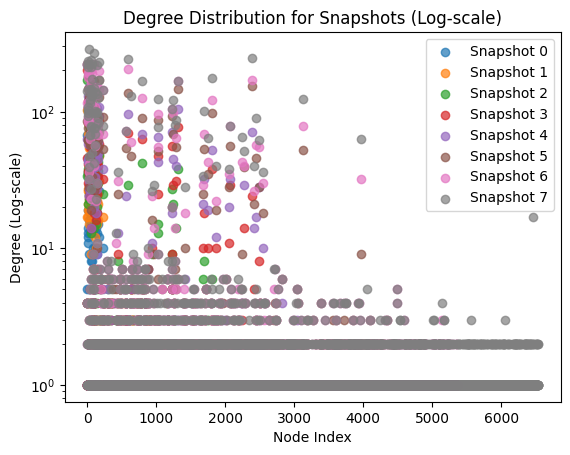

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


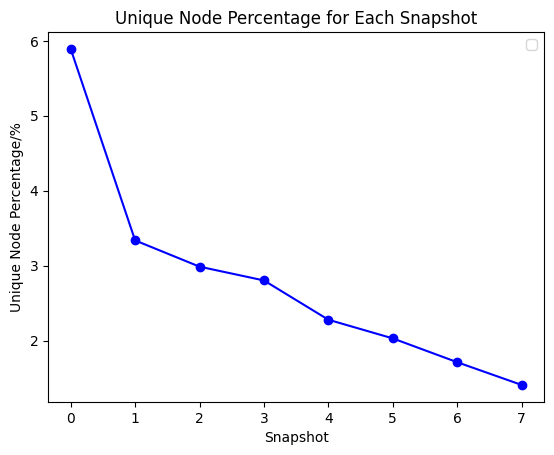

In [36]:
sample_set = [2000, 5000, 10000, 15000, 20000, 30000, 40000, 50000]
unique_percentage = snapshots_uniqueness(edges, sample_set)

plt.plot(unique_percentage, marker='o', linestyle='-', color='b')
plt.xlabel('Snapshot')
plt.ylabel('Unique Node Percentage/%')
plt.title('Unique Node Percentage for Each Snapshot')
plt.xticks(range(len(unique_percentage)), range(len(unique_percentage)))
plt.legend()
plt.show()  

#### Dataset 2

#### Trash

In [15]:
sub_edge_1 = edges[:2000]
snapshot_1 = nx.DiGraph()
snapshot_1.add_edges_from(sub_edge_1)

sub_edge_2 = edges[:5000]
snapshot_2 = nx.DiGraph()
snapshot_2.add_edges_from(sub_edge_2)

sub_edge_3 = edges[:10000]
snapshot_3 = nx.DiGraph()
snapshot_3.add_edges_from(sub_edge_3)

sub_edge_4 = edges[:20000]
snapshot_4 = nx.DiGraph()
snapshot_4.add_edges_from(sub_edge_4)

sub_edge_5 = edges[:40000]
snapshot_5 = nx.DiGraph()
snapshot_5.add_edges_from(sub_edge_5)

In [16]:
# snapshot 1 properties (2000)
print(snapshot_1.number_of_nodes())
print(snapshot_1.number_of_edges())
print(nx.density(snapshot_1))

print(snapshot_2.number_of_nodes())
print(snapshot_2.number_of_edges())
print(nx.density(snapshot_2))

print(snapshot_3.number_of_nodes())
print(snapshot_3.number_of_edges())
print(nx.density(snapshot_3))

645
807
0.0019427993644373827
1169
1540
0.0011278812238536625
1909
2614
0.0007176642034366616


In [22]:
percents = []
percent_1 = n_m_anonymity(snapshot_1)
percents.append(percent_1)
percent_2 = n_m_anonymity(snapshot_2)
percents.append(percent_2)
percent_3 = n_m_anonymity(snapshot_3)
percents.append(percent_3)
percent_4 = n_m_anonymity(snapshot_4)
percents.append(percent_4)
percent_5 = n_m_anonymity(snapshot_5)
percents.append(percent_5)

Percentage of nodes with unique (n, m) values: 5.891472868217054
Percentage of nodes with unique (n, m) values: 3.3361847733105217
Percentage of nodes with unique (n, m) values: 2.9858564693556837
Percentage of nodes with unique (n, m) values: 2.277831247994867
Percentage of nodes with unique (n, m) values: 1.710991259066394


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


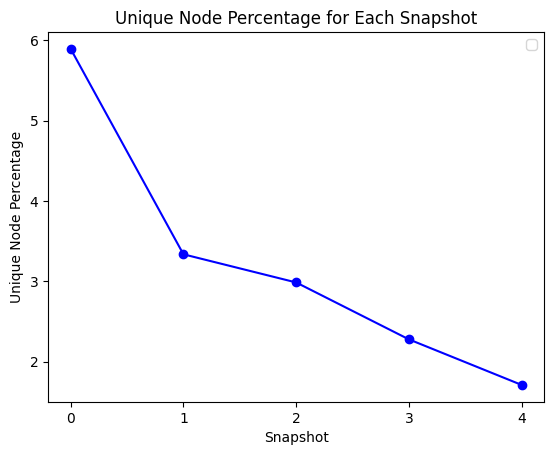

In [24]:
plt.plot(percents, marker='o', linestyle='-', color='b')
plt.xlabel('Snapshot')
plt.ylabel('Unique Node Percentage/%')
plt.title('Unique Node Percentage for Each Snapshot')
plt.xticks(range(len(percents)), range(len(percents)))
plt.legend()
plt.show()

In [ ]:
# uniqueness node ploting
for i in range(1, 6):
    snapshot_name = f"snapshot_{i}"

    # Assuming you have a function to extract the subgraph for a given snapshot name
    subgraph = temporal_graph.subgraph(
        [node for node, data in temporal_graph.nodes(data=True) if data.get('snapshot') == snapshot_name]
    )

    # Calculate the unique node percentage using n_m_anonymity function
    unique_percentage = n_m_anonymity(subgraph)

    # Plot the unique node percentage
    plt.bar(i, unique_percentage, label=snapshot_name)

plt.xlabel('Snapshot')
plt.ylabel('Unique Node Percentage')
plt.title('Unique Node Percentage for Each Snapshot')
plt.legend()
plt.show()

In [3]:
timestamp_1 = 1095987386
timestamp_2 = 1100699962
timestamp_3 = 1103835806

snapshot_1 = G.subgraph([node for node, data in G.nodes(data=True) if data.get('timestamp', 0) <= timestamp_1])
snapshot_2 = G.subgraph([node for node, data in G.nodes(data=True) if data.get('timestamp', 0) <= timestamp_2])
snapshot_3 = G.subgraph([node for node, data in G.nodes(data=True) if data.get('timestamp', 0) <= timestamp_3])

In [4]:
timestamps_of_interest = [1098357366, 1100699962, 1103835806]

for timestamp in timestamps_of_interest:
    subgraph_at_timestamp = G.subgraph(
        [node for node, data in G.nodes(data=True) if data.get('timestamp', 0) <= timestamp]
    )

    # Print subgraph properties
    print(f"Timestamp {timestamp}: Number of nodes = {subgraph_at_timestamp.number_of_nodes()}, Number of edges = {subgraph_at_timestamp.number_of_edges()}")

Timestamp 1098357366: Number of nodes = 6809, Number of edges = 9484
Timestamp 1100699962: Number of nodes = 6809, Number of edges = 9484
Timestamp 1103835806: Number of nodes = 6809, Number of edges = 9484


In [51]:
# snapshot 1 properties (t=5000)
print(snapshot_1.number_of_nodes())
print(snapshot_1.number_of_edges())
print(nx.density(snapshot_1))
# Infinite paths because not strongly connected

print(snapshot_3.number_of_nodes())
print(snapshot_3.number_of_edges())
print(nx.density(snapshot_3))

6809
9484
0.00020459200764040266
6809
9484
0.00020459200764040266


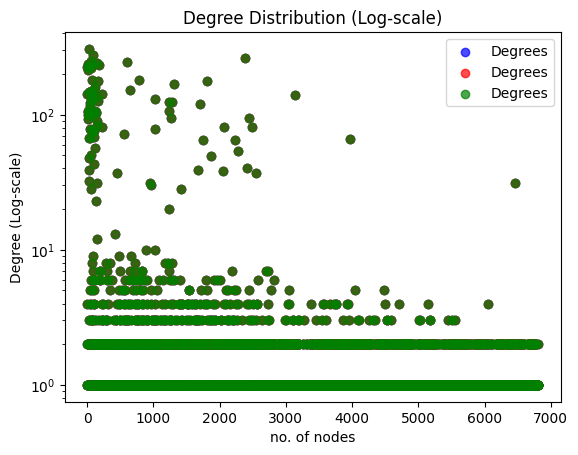

In [53]:
# Compute the degree distribution
degree_sequence1 = [degree for node, degree in snapshot_1.degree()]
degree_sequence2 = [degree for node, degree in snapshot_2.degree()]
degree_sequence3 = [degree for node, degree in snapshot_3.degree()]

# Plot the degree distribution histogram
plt.scatter(range(len(degree_sequence1)), degree_sequence1, color='blue', alpha=0.7, label='Degrees')
plt.scatter(range(len(degree_sequence2)), degree_sequence2, color='red', alpha=0.7, label='Degrees')
plt.scatter(range(len(degree_sequence3)), degree_sequence3, color='green', alpha=0.7, label='Degrees')
plt.yscale('log')  # Log-scale y-axis

plt.title("Degree Distribution (Log-scale)")
plt.xlabel("no. of nodes")
plt.ylabel("Degree (Log-scale)")
plt.legend()
plt.show()

In [56]:
ego_properties = {}

for node in snapshot_1.nodes():
    ego_net = nx.ego_graph(G, node)
    
    n = ego_net.number_of_nodes()
    m = ego_net.number_of_edges()
    
    ego_properties[node] = (n, m)